In [1]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [3]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [4]:
# Import the sqlalchemy extract function.
from sqlalchemy import extract

# 1. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
results = session.query(Measurement.date, Measurement.tobs).filter(extract("month", Measurement.date)==6)

# option: use 'like' comparison
# session.query(Measurement.date, Measurement.tobs).filter(Measurement.date.like('%-06-%''))

In [5]:
# 2. Convert the June temperatures to a list.
june_temps_list = results.all()

In [6]:
# 3. Create a DataFrame from the list of temperatures for the month of June. 
june_temps_df = pd.DataFrame(june_temps_list, columns=['date','temp'])

# alternatively, just put the entire query right into a dataframe
#pd.DataFrame(session.query(Measurement.date, Measurement.tobs).filter(extract("month", Measurement.date)==6).all(),\
#             columns=['date','temp'])

In [7]:
# 4. Calculate and print out the summary statistics for the June temperature DataFrame.
june_temps_df.describe()

,temp
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


In [8]:
# 5. Return to your challenge instructions to compare your summary statistics

## D2: Determine the Summary Statistics for December

In [9]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
results = session.query(Measurement.date, Measurement.tobs).filter(extract("month", Measurement.date)==12)

In [10]:
# 7. Convert the December temperatures to a list.
dec_temps_list = results.all()

In [11]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
dec_temps_df = pd.DataFrame(dec_temps_list, columns=['date','temp'])

In [12]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
dec_temps_df.describe()

,temp
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


In [13]:
# 10. Return to your challenge instructions to compare your summary statistics

In [14]:
# get temperature data for each month
# store each result straight into a dataframe
# filter on month using a for loop
# store each df as an element of a list

list_of_dfs = []
for monthnum in range(1,13):
    list_of_dfs.append(
        pd.DataFrame(session.query(Measurement.date, Measurement.tobs).\
                     filter(extract("month", Measurement.date)==monthnum).all(),\
             columns=['date','temp'])
    )

Text(0.5, 1.0, 'Average Oahu temperature')

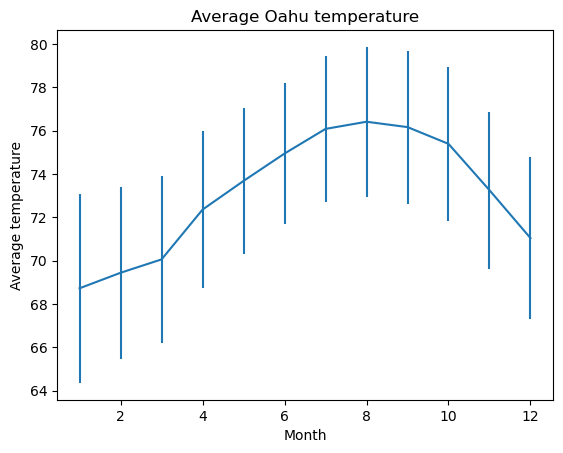

In [15]:
#for df in list_of_dfs:
#    print(df.describe())

# store the average temp and std dev of temp as list in a list, convert to np array for index slicing
temps_avg_std = np.asarray([[df.describe().loc['mean', 'temp'], df.describe().loc['std', 'temp']]  for df in list_of_dfs])
temps_avg_std


plt.errorbar(range(1,len(temps_avg_std)+1), temps_avg_std[:,0], yerr=temps_avg_std[:,1])
#plt.ylim(32,100)
plt.xlabel("Month")
plt.ylabel("Average temperature")
plt.title("Average Oahu temperature")


In [16]:
for tempdf in list_of_dfs:
    print(tempdf.describe())

              temp
count  1727.000000
mean     68.726115
std       4.367892
min      54.000000
25%      66.000000
50%      69.000000
75%      72.000000
max      81.000000
              temp
count  1610.000000
mean     69.442236
std       3.981399
min      56.000000
25%      67.000000
50%      70.000000
75%      72.000000
max      83.000000
              temp
count  1693.000000
mean     70.059067
std       3.845271
min      56.000000
25%      68.000000
50%      70.000000
75%      73.000000
max      82.000000
              temp
count  1713.000000
mean     72.357268
std       3.632131
min      53.000000
25%      70.000000
50%      73.000000
75%      75.000000
max      84.000000
              temp
count  1733.000000
mean     73.680900
std       3.355783
min      63.000000
25%      71.000000
50%      74.000000
75%      76.000000
max      87.000000
              temp
count  1700.000000
mean     74.944118
std       3.257417
min      64.000000
25%      73.000000
50%      75.000000
75%      77.